In [1]:
import numpy as np
import pandas as pd
import plotly 

import matplotlib.pyplot as plt
import matplotlib as mpl

from opentisim import hydrogen_objects
from opentisim import hydrogen_defaults
from opentisim import hydrogen_system

from opentisim import core
from opentisim import plot

# plotly.tools.set_credentials_file(username='stephh', api_key='aYheUBjQH0kyWL5yo9E6')

# 0. Prepare inputs

In [2]:
startyear = 2019
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [25]:
scenario = 'permanent' #choice between permanent or random

if scenario == 'random': 
    # instantiate a commodity object
    lhydrogen = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_lhydrogen_data)
    ammonia = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_ammonia_data)
    MCH = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_MCH_data)

    # create a future througput scenario
    lhydrogen.scenario_random(startyear = startyear, lifecycle = lifecycle)
    ammonia.scenario_random(startyear = startyear, lifecycle = lifecycle)
    MCH.scenario_random(startyear = startyear, lifecycle = lifecycle)

    demand = [ammonia]

    # plot scenarios 
    if True:
        lhydrogen.plot_demand()
        ammonia.plot_demand()
        MCH.plot_demand()
else: 
    years = list(range(startyear, startyear+lifecycle))

    demand = []
    for year in years: 
        if year < 2024: 
            demand.append(100000)
        else: 
            demand.append(300000)

    scenario_data={'year': years, 'volume': demand}

    # instantiate a commodity objects
    hydrogen_defaults.commodity_lhydrogen_data['historic_data'] = []
    hydrogen_defaults.commodity_lhydrogen_data['scenario_data'] = []
    lhydrogen = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_lhydrogen_data)
    lhydrogen.scenario_data = pd.DataFrame(data=scenario_data)

    # Ammonia
    hydrogen_defaults.commodity_ammonia_data['historic_data'] = []
    hydrogen_defaults.commodity_ammonia_data['scenario_data'] = []
    ammonia = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_ammonia_data)

    # MCH
    hydrogen_defaults.commodity_MCH_data['historic_data'] = []
    hydrogen_defaults.commodity_MCH_data['scenario_data'] = []
    MCH = hydrogen_objects.Commodity(**hydrogen_defaults.commodity_MCH_data)

    # combine
    demand = [lhydrogen, ammonia, MCH]

    # plot scenarios 
    if False:
        lhydrogen.plot_demand()
        ammonia.plot_demand()
        MCH.plot_demand()

## 0.2 Generate vessels

In [26]:
# instantiate vessels
Smallhydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.smallhydrogen_data)
Largehydrogen = hydrogen_objects.Vessel(**hydrogen_defaults.largehydrogen_data)
Smallammonia = hydrogen_objects.Vessel(**hydrogen_defaults.smallammonia_data)
Largeammonia = hydrogen_objects.Vessel(**hydrogen_defaults.largeammonia_data)
Handysize = hydrogen_objects.Vessel(**hydrogen_defaults.handysize_data)
Panamax = hydrogen_objects.Vessel(**hydrogen_defaults.panamax_data)
VLCC = hydrogen_objects.Vessel(**hydrogen_defaults.vlcc_data)


vessels = [Smallhydrogen, Largehydrogen, Smallammonia, Largeammonia, Handysize, Panamax, VLCC] 

# 1. Instantiate terminal system

In [27]:
Terminal = hydrogen_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True)

   year  volume
0  2019  100000
1  2020  100000
2  2021  100000
3  2022  100000
4  2023  100000
5  2024  300000
6  2025  300000
7  2026  300000
8  2027  300000
9  2028  300000


0

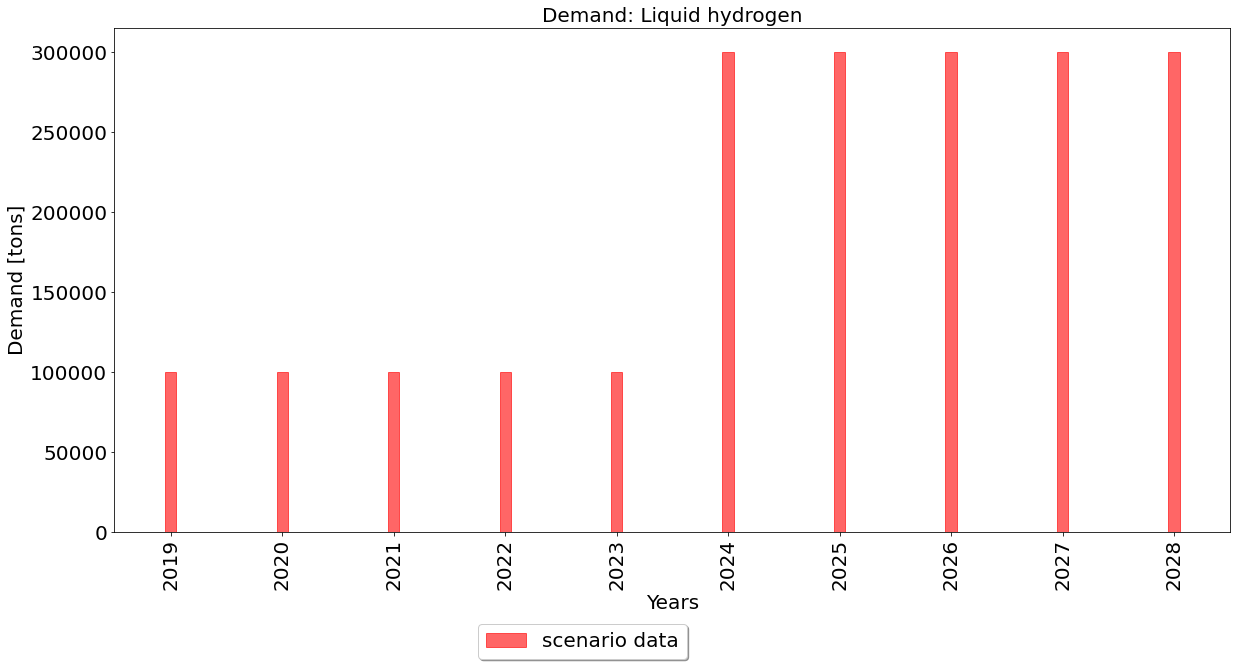

In [28]:
print(Terminal.elements[0].scenario_data)
Terminal.elements[0].plot_demand()
Terminal.elements[0].largeammonia_perc

In [29]:
Terminal.elements[0].__dict__

{'historic_data': [],
 'scenario_data':    year  volume
 0  2019  100000
 1  2020  100000
 2  2021  100000
 3  2022  100000
 4  2023  100000
 5  2024  300000
 6  2025  300000
 7  2026  300000
 8  2027  300000
 9  2028  300000,
 'type': 'Liquid hydrogen',
 'handling_fee': 490,
 'smallhydrogen_perc': 30,
 'largehydrogen_perc': 70,
 'smallammonia_perc': 0,
 'largeammonia_perc': 0,
 'handysize_perc': 0,
 'panamax_perc': 0,
 'vlcc_perc': 0,
 'name': 'Liquid hydrogen',
 'id': '558d0ce5-64cf-11eb-bcf4-5c879c007034'}

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [30]:
Terminal.simulate()


### Simulate year: 2019 ############################
0
--- Cargo volume and vessel calls for 2019 ---------
  Total cargo volume: 0.0
  Total vessel calls: 0
     Small Hydrogen  calls: 0
     Large Hydrogen calls: 0
     Small ammonia calls: 0
     Large ammonia calls: 0
     Handysize calls: 0
     Panamax calls: 0
     VLCC calls: 0
----------------------------------------------------

--- Status terminal @ start of year ----------------
     Berth occupancy online (@ start of year): inf (trigger level: 0.50)
     Berth occupancy planned (@ start of year): inf (trigger level: 0.50)
     Unloading occupancy online (@ start of year): inf
     Unloading occupancy planned (@ start of year): inf
     waiting time occupancy (@ start of year): inf
     waiting time factor (@ start of year): inf
     throughput online 0.00
     throughput planned 0.00

--- Start investment analysis ----------------------

$$$ Check berth elements ---------------------------
  *** add Berth to elements
    

     Revenues: 0
     Revenues: 0
     Revenues: 15000000
     Revenues: 15000000
     Revenues: 15000000
     Revenues: 45000000
     Revenues: 45000000
     Revenues: 45000000
     Revenues: 45000000
     Revenues: 45000000


c:\users\mrv\onedrive - van oord\software\github\opentisim\opentisim\hydrogen_system.py:207: RuntimeWarning: invalid value encountered in double_scalars
  waiting_time_occupancy = waiting_time_hours * total_calls / self.operational_hours
c:\users\mrv\onedrive - van oord\software\github\opentisim\opentisim\hydrogen_system.py:707: RuntimeWarning: invalid value encountered in double_scalars
  waiting_time_occupancy = waiting_time_hours * total_calls / self.operational_hours
c:\users\mrv\onedrive - van oord\software\github\opentisim\opentisim\hydrogen_system.py:707: RuntimeWarning: invalid value encountered in double_scalars
  waiting_time_occupancy = waiting_time_hours * total_calls / self.operational_hours


## Report all elements

In [9]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

In [10]:
# Terminal.add_cashflow_elements()

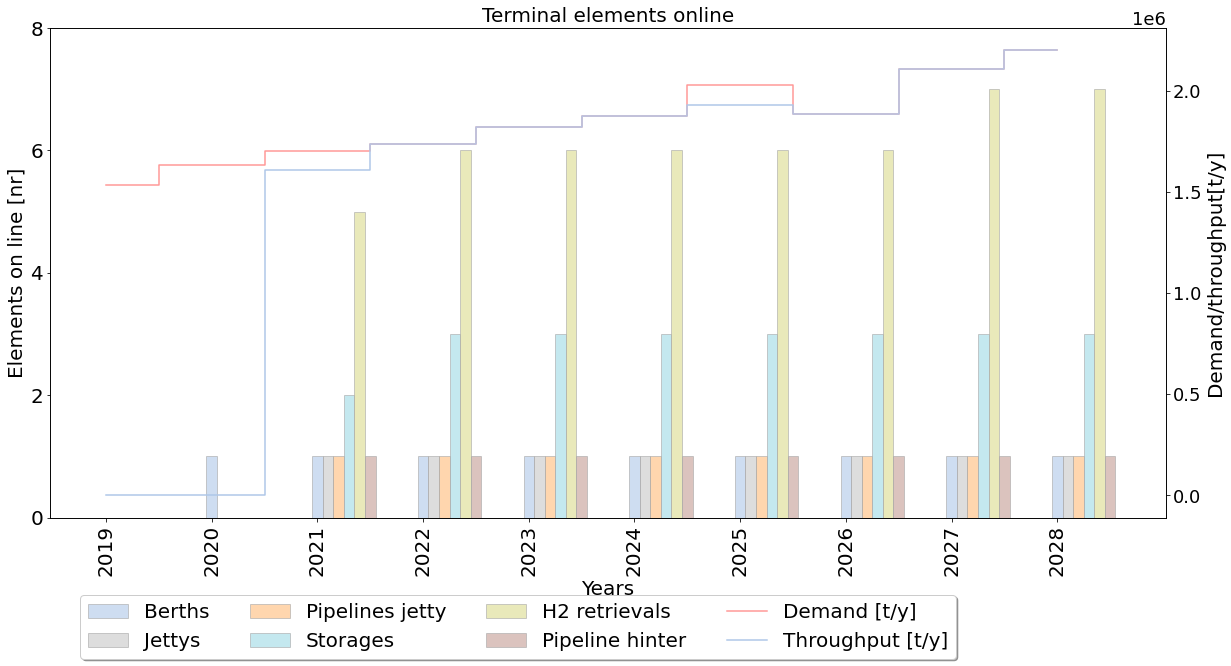

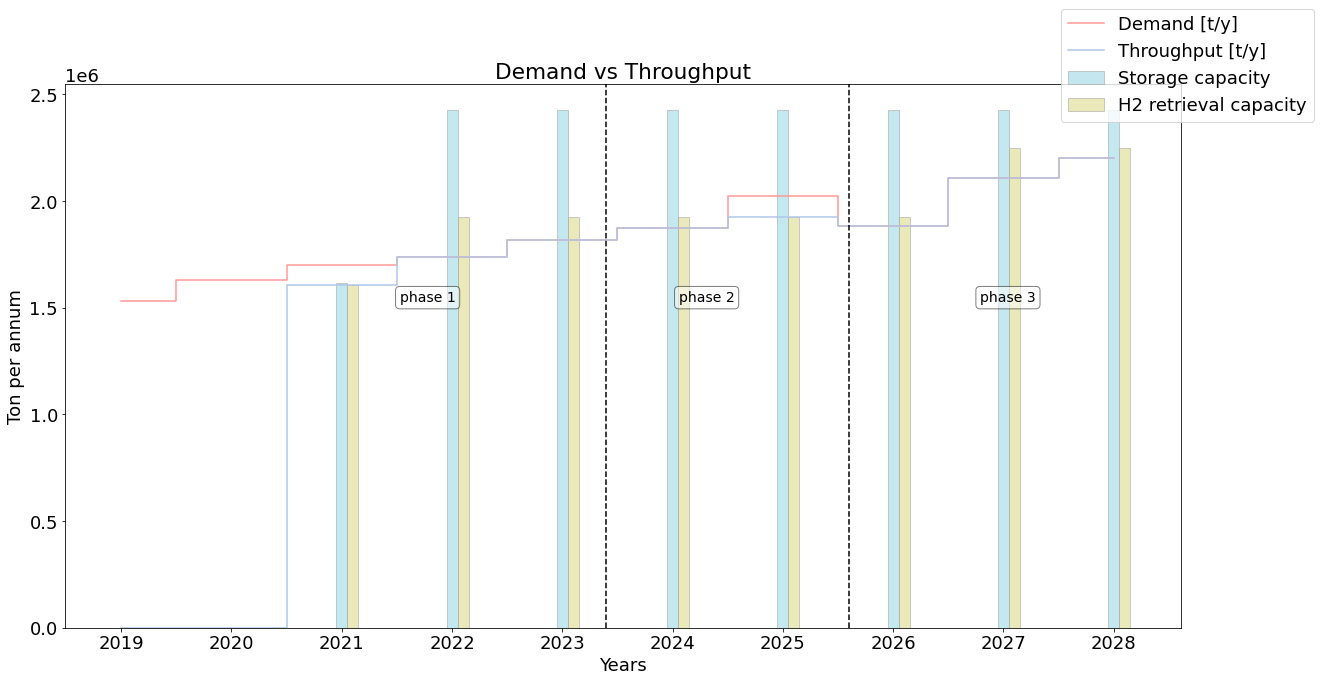

In [11]:
Terminal.terminal_elements_plot()
Terminal.demand_terminal_plot()

In [17]:
Terminal.__dict__

{'startyear': 2019,
 'lifecycle': 10,
 'operational_hours': 5840,
 'debug': True,
 'elements': [<opentisim.hydrogen_objects.Commodity at 0x26e934ec640>,
 'commodity_type_defaults': {'name': 'Ammonia',
  'type': 'Ammonia',
  'handling_fee': 150,
  'smallhydrogen_perc': 0,
  'largehydrogen_perc': 0,
  'smallammonia_perc': 40,
  'largeammonia_perc': 60,
  'handysize_perc': 0,
  'panamax_perc': 0,
  'vlcc_perc': 0,
  'historic_data':    year   volume
  0  2014  1000000
  1  2015  1100000
  2  2016  1250000
  3  2017  1400000
  4  2018  1500000},
 'storage_type_defaults': {'name': 'ATank_01',
  'type': 'AmmoniaTank',
  'ownership': 'Terminal operator',
  'delivery_time': 1,
  'lifespan': 30,
  'unit_rate': 60000000,
  'mobilisation_min': 200000,
  'mobilisation_perc': 0.003,
  'maintenance_perc': 0.01,
  'crew_min': 3,
  'crew_for5': 1,
  'insurance_perc': 0.01,
  'storage_type': 'tank',
  'consumption': 100,
  'capacity': 34130},
 'h2retrieval_type_defaults': {'name': 'H2retrieval_NH3_01',

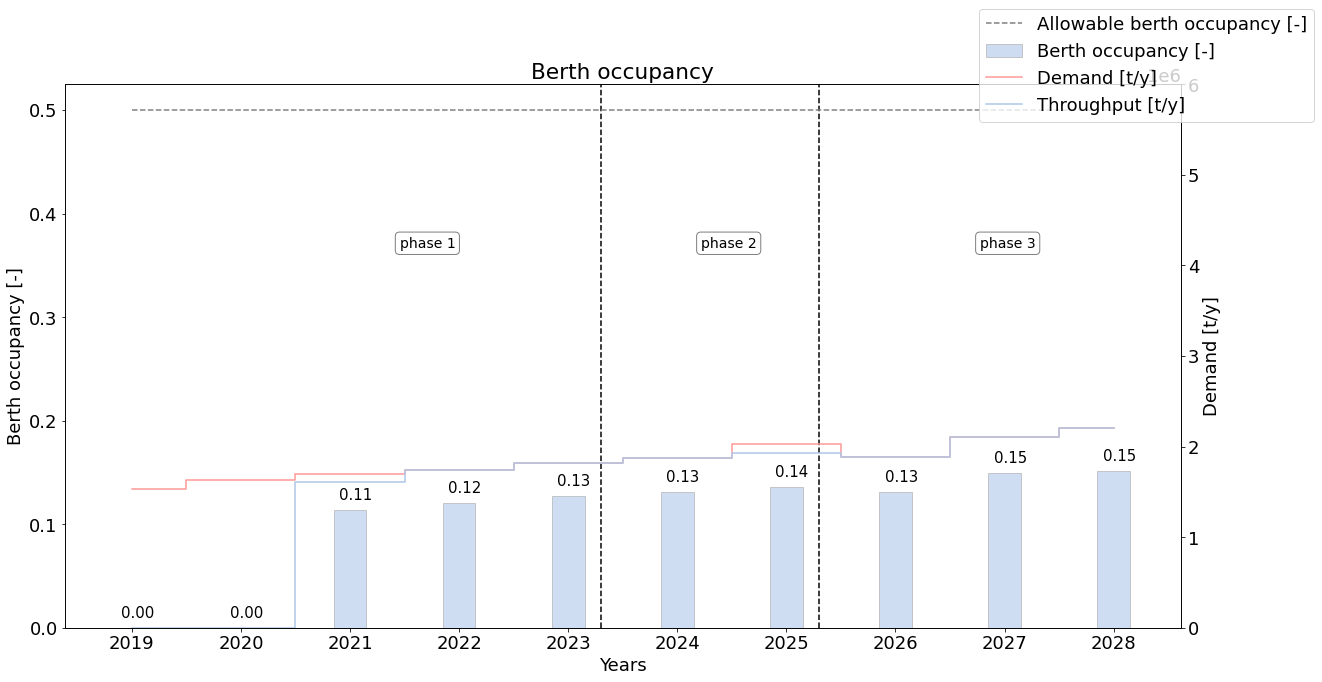

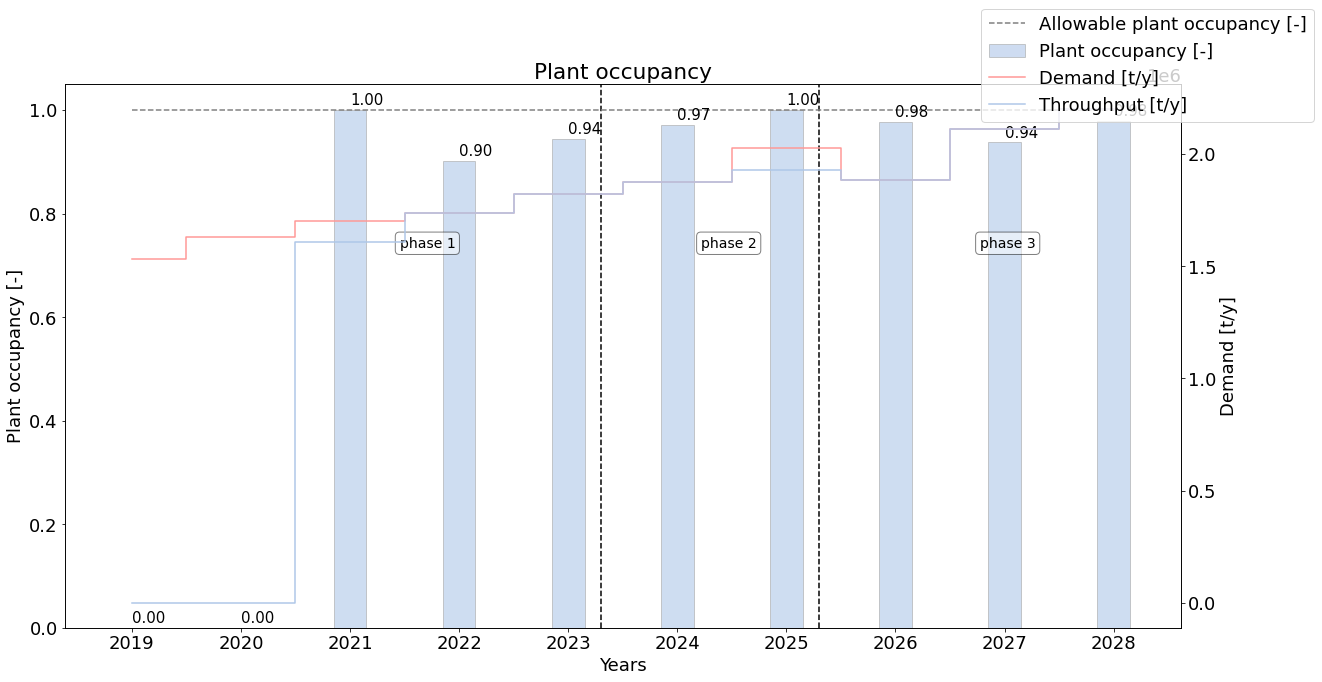

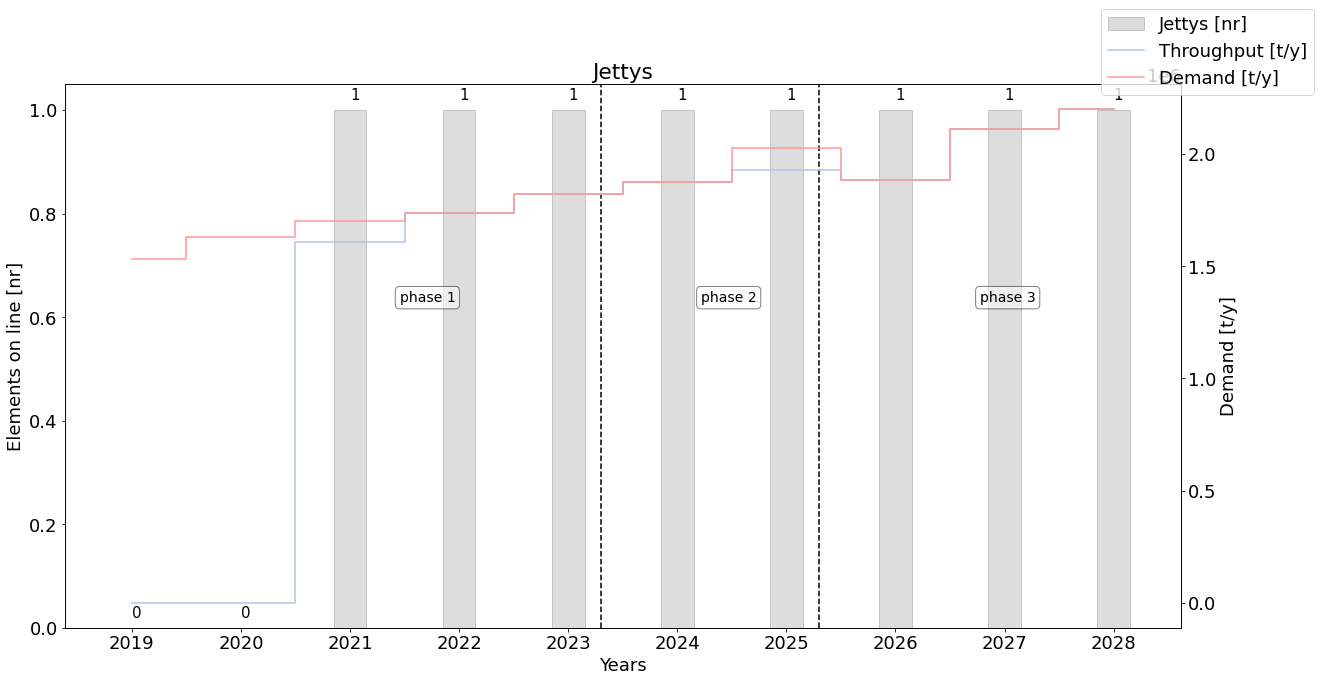

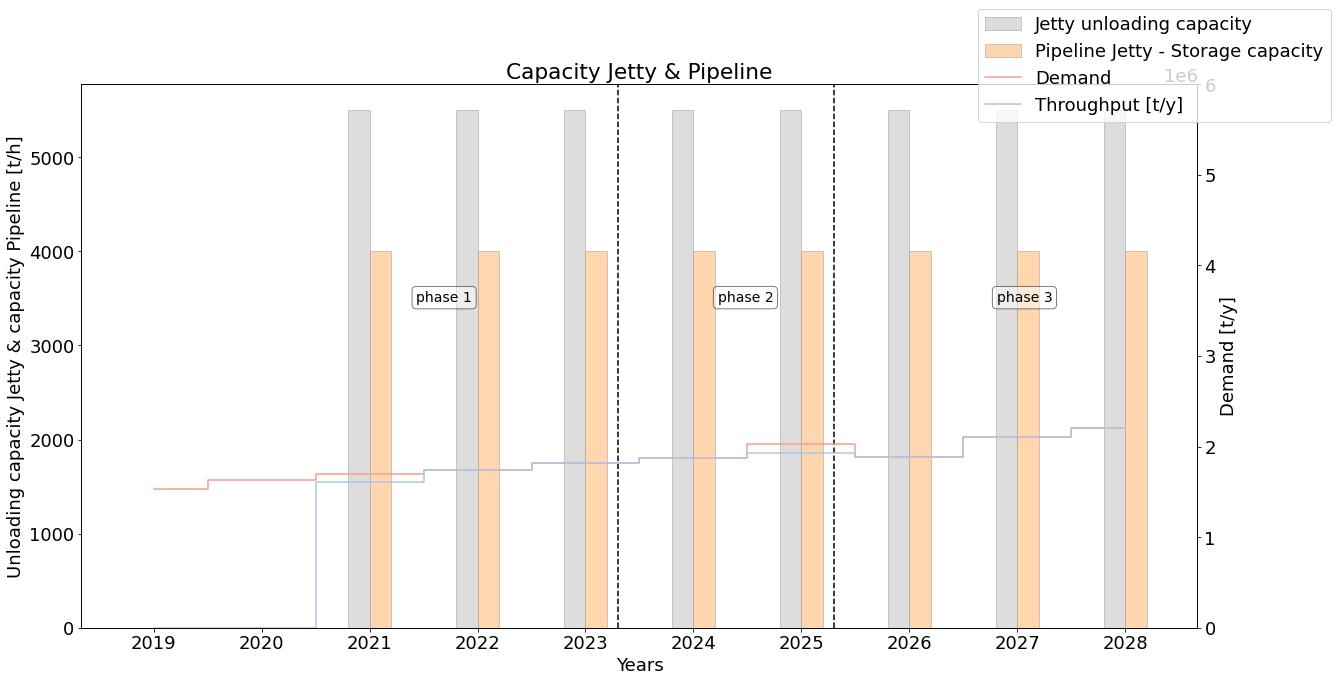

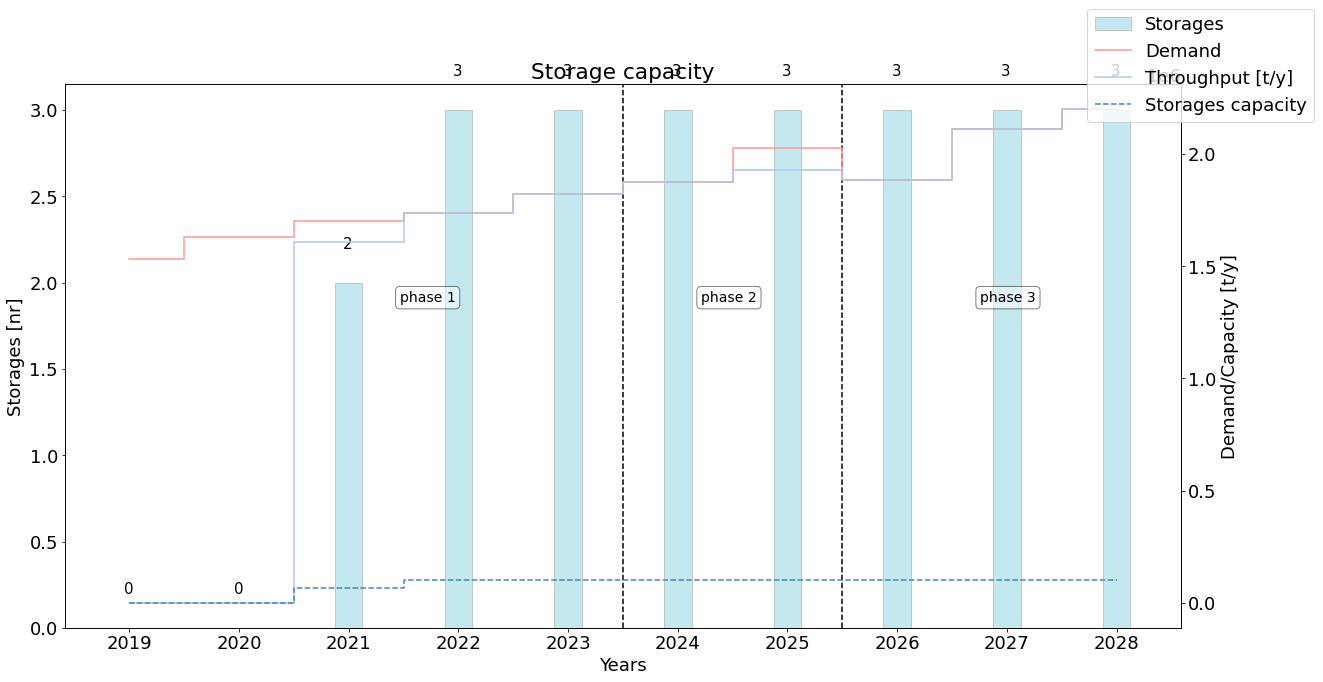

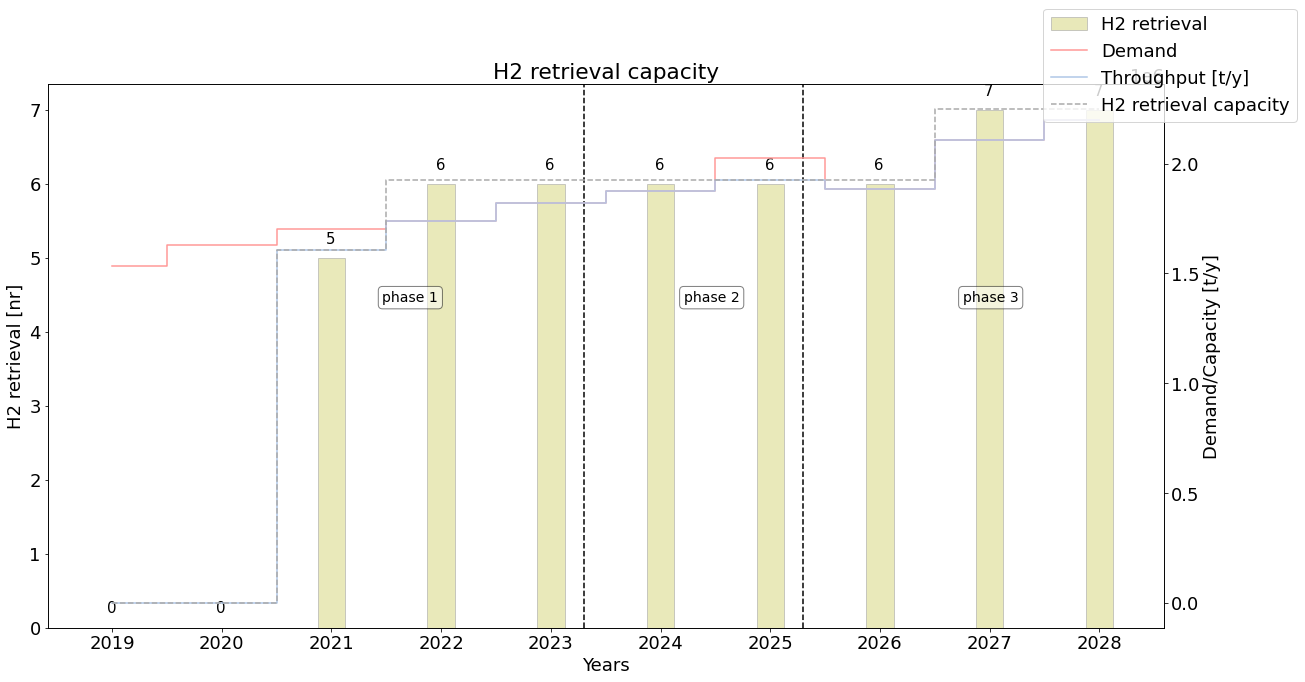

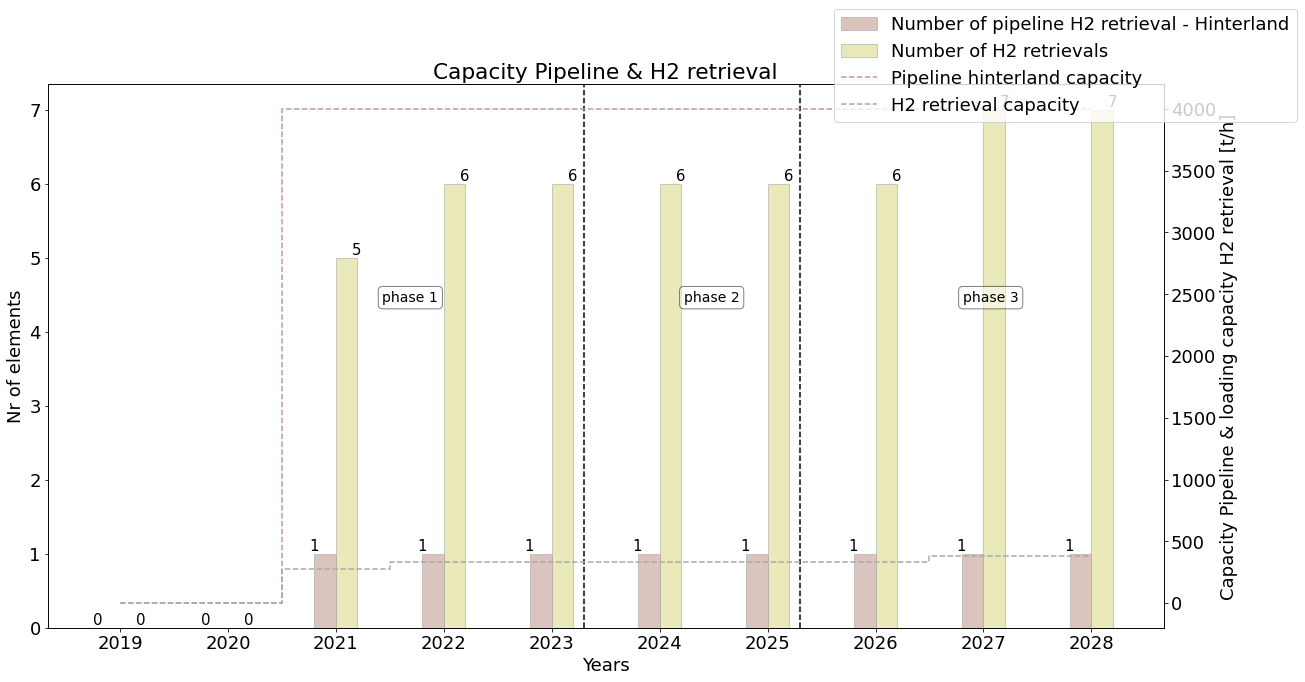

In [12]:
if True: 
    # to plot the terminal occupany's 
    Terminal.terminal_occupancy_plot() #occupancy of the berth 
    Terminal.plant_occupancy_plot() #occupancy of the plant
    
    # to plot the capacities of the different elements 
    Terminal.Jetty_capacity_plot() #jetty
    Terminal.Pipeline1_capacity_plot() #pipeline from jetty to storage
    Terminal.Storage_capacity_plot() #storage
    Terminal.H2retrieval_capacity_plot() # H2 retrieval
    Terminal.Pipeline2_capacity_plot() #pipeline from H2 retrieval to hinterland        

In [13]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = core.add_cashflow_elements(Terminal, hydrogen_objects.Labour(**hydrogen_defaults.labour_data))

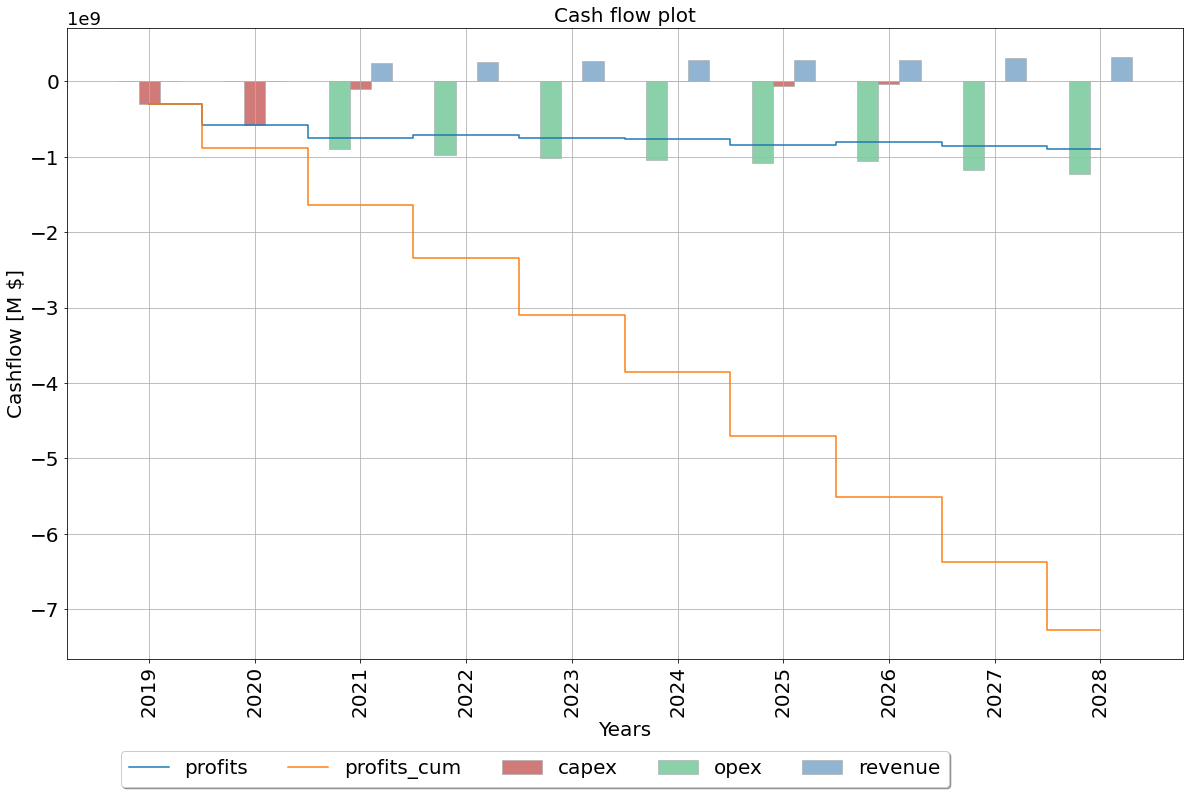

In [14]:
plot.cashflow_plot(Terminal, cash_flows, title='Cash flow plot')

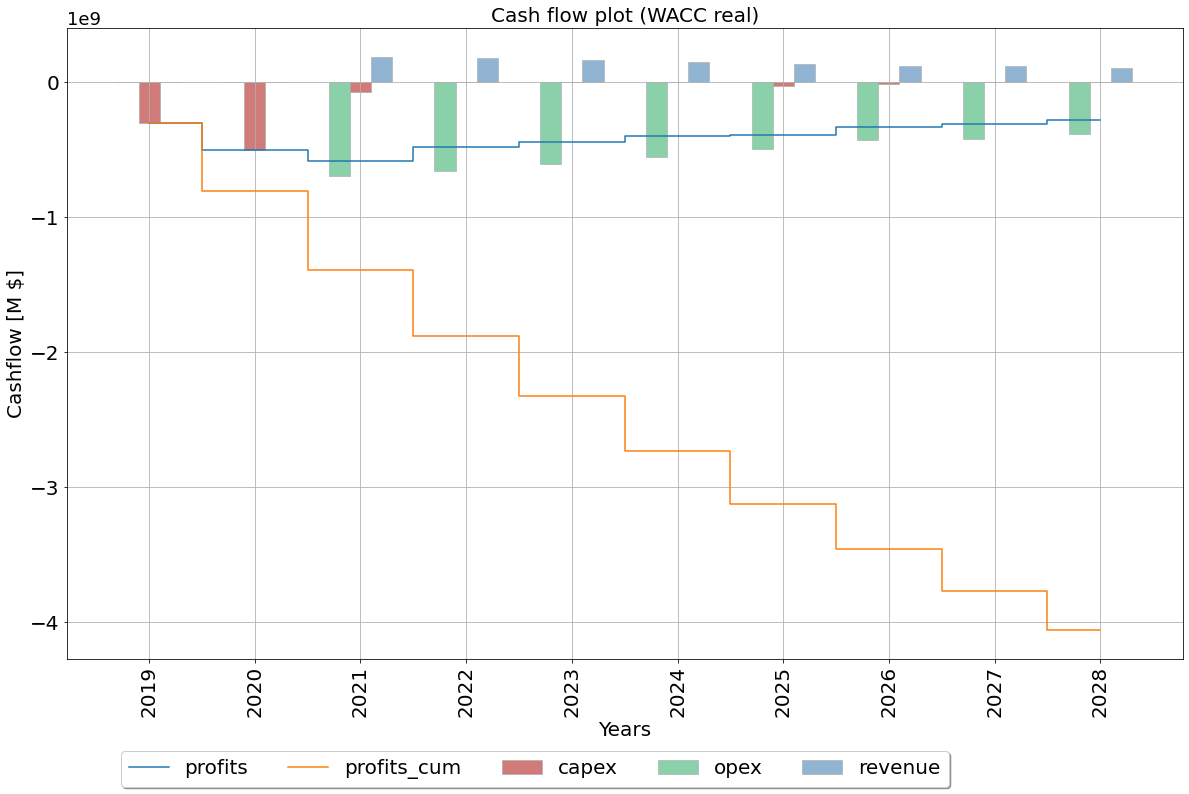

In [15]:
plot.cashflow_plot(Terminal, cash_flows_WACC_real, title='Cash flow plot (WACC real)')

In [16]:
core.NPV(Terminal, hydrogen_objects.Labour(**hydrogen_defaults.labour_data))

,CAPEX,OPEX,REVENUES,PV,cum-PV
2019,-3.032760e+08,-0.000000e+00,0.000000e+00,-3.032760e+08,-3.032760e+08
2020,-5.069745e+08,-0.000000e+00,0.000000e+00,-5.069745e+08,-8.102505e+08
2021,-7.774949e+07,-6.950710e+08,1.867756e+08,-5.860449e+08,-1.396295e+09
2022,-0.000000e+00,-6.645161e+08,1.780204e+08,-4.864957e+08,-1.882791e+09
2023,-0.000000e+00,-6.118986e+08,1.641134e+08,-4.477852e+08,-2.330576e+09
2024,-0.000000e+00,-5.540522e+08,1.487018e+08,-4.053504e+08,-2.735927e+09
2025,-2.802004e+07,-5.016607e+08,1.347311e+08,-3.949497e+08,-3.130876e+09
2026,-1.644823e+07,-4.319230e+08,1.159391e+08,-3.324322e+08,-3.463309e+09
2027,-0.000000e+00,-4.256555e+08,1.142875e+08,-3.113680e+08,-3.774677e+09
2028,-0.000000e+00,-3.906698e+08,1.049964e+08,-2.856734e+08,-4.060350e+09
